In [ ]:
import pathlib
import os, shutil
import matplotlib.pyplot as plt
import random
import json

from PIL import Image, ImageOps
from IPython.display import Image as DImage

from keras import layers, models
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from tensorflow.keras import optimizers
from tensorflow.keras.utils import load_img, img_to_array, array_to_img

from keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import maxnorm


In [ ]:
class HandModel(object):
    
    def __init__(self):       
        #инициализация модели
        self.model  = models.Sequential()    
    
    #добавления слоя в модель
    def add(self, layer):
        self.model.add(layer)

    #настройка модели
    def compileModel(self, loss, optimizer, metrics):
        self.model.compile(loss= loss, optimizer=optimizer, metrics=metrics)

    #загрузка преобученной модели
    def loadModel(self, pathToFile):
        self.model = load_model(pathToFile)
    
    #обучение
    def train(self, pathToFile, train_generator, validation_generator, steps_per_epoch, epochs,  batch_size, validation_steps): 
        self.epochs = epochs
        self.history = self.model.fit(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_steps,
            batch_size=batch_size)
        self.model.save(pathToFile)
    
    def drawError(self):
      acc = self.history.history['acc']
      val_acc = self.history.history['val_acc']
      loss = self.history.history['loss']
      val_loss = self.history.history['val_loss']
      epochs = range(1, self.epochs + 1)
      plt.plot(epochs, acc, 'bo', label='Train acc')
      plt.plot(epochs, val_acc, 'b', label='Validation acc')
      plt.legend()
      plt.figure()

      plt.plot(epochs, loss, 'bo', label='Train loss')
      plt.plot(epochs, val_loss, 'b', label='Validation loss')
      plt.legend()
      plt.figure()

In [ ]:
model = HandModel()


model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_datasets_dir = os.path.join("drive/MyDrive", "handData")
picture  = os.path.join(original_datasets_dir, "cuts_full")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
    picture,
    target_size=(32, 32),
    batch_size=16,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    picture, # same directory as training data
    target_size=(32, 32),
    batch_size=16,
    class_mode='categorical',
    subset='validation') # set as validation data

loss='categorical_crossentropy'
optimizer="Adam"
metrics=['acc']

model.compileModel(loss, optimizer,metrics)

Found 103546 images belonging to 7 classes.
Found 25883 images belonging to 7 classes.


In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)


#train and safe
batch_size = 32

modelSavePath = os.path.join(pathlib.Path().resolve(),"drive/MyDrive/handData/modelVER2.h5")
model.train(modelSavePath, 
                train_generator,
                validation_generator,
                steps_per_epoch = 40, 
                epochs=20,
                validation_steps = 1,
                batch_size = batch_size 
                )

Epoch 1/20
40/40 [==============================] - 171s 4s/step - loss: 1.8417 - acc: 0.2000 - val_loss: 1.7522 - val_acc: 0.2500
Epoch 2/20
40/40 [==============================] - 132s 3s/step - loss: 1.8025 - acc: 0.2172 - val_loss: 1.8590 - val_acc: 0.2500
Epoch 3/20
40/40 [==============================] - 133s 3s/step - loss: 1.7310 - acc: 0.2656 - val_loss: 1.4838 - val_acc: 0.3125
Epoch 4/20
40/40 [==============================] - 132s 3s/step - loss: 1.4522 - acc: 0.4125 - val_loss: 1.1211 - val_acc: 0.5625
Epoch 5/20
40/40 [==============================] - 131s 3s/step - loss: 1.2316 - acc: 0.5500 - val_loss: 0.9545 - val_acc: 0.6875
Epoch 6/20
40/40 [==============================] - 130s 3s/step - loss: 1.0472 - acc: 0.6234 - val_loss: 0.6279 - val_acc: 0.8750
Epoch 7/20
40/40 [==============================] - 128s 3s/step - loss: 0.9068 - acc: 0.6812 - val_loss: 0.6036 - val_acc: 0.8125
Epoch 8/20
40/40 [==============================] - 128s 3s/step - loss: 0.7003 - a

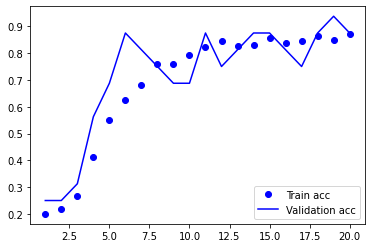

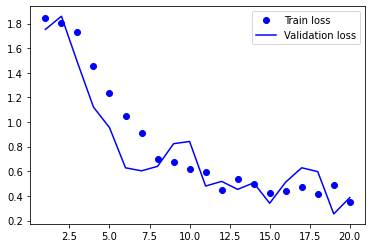

<Figure size 432x288 with 0 Axes>

In [ ]:
model.drawError()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
original_datasets_dir = os.path.join("drive/MyDrive", "handData")
picture  = os.path.join(original_datasets_dir, "validation")

val_datagen = ImageDataGenerator(rescale=1./255    )

validation = val_datagen.flow_from_directory(
    picture,
    target_size=(32, 32),
    shuffle=False) # set as training data


Found 1160 images belonging to 7 classes.


In [ ]:
y_pred = model.model.predict(validation, batch_size=16, verbose=1)

37/37 [==============================] - 56s 2s/step


In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)

In [ ]:
validation.class_indices

{'call': 0, 'dislike': 1, 'like': 2, 'mute': 3, 'ok': 4, 'rock': 5, 'stop': 6}

In [ ]:
validation.samples

1160

In [ ]:
call = [0] * 167
dislike = [1] * 164
like = [2]* 160
mute = [3]* 170
ok = [4]* 166
rock = [5]* 164
stop = [6]* 169

test_labels = call + dislike + like + mute + ok + rock + stop
print(len(test_labels))

1160


In [ ]:
print(classification_report( test_labels, y_pred_bool))

              precision    recall  f1-score   support

           0       0.12      0.16      0.14       167
           1       0.16      0.20      0.18       164
           2       0.00      0.00      0.00       160
           3       0.15      0.23      0.18       170
           4       0.12      0.14      0.13       166
           5       0.15      0.24      0.18       164
           6       0.06      0.01      0.01       169

    accuracy                           0.14      1160
   macro avg       0.11      0.14      0.12      1160
weighted avg       0.11      0.14      0.12      1160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
